# Density Plots

Notebook to make probability density plots of tmax events

Cascade Tuholske 2019-10-04

In [1]:
# Dependencies

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import glob

In [2]:
# Open Files and Isolate India for Density

def event_stack_loop(dir_in):
    
    """ Loop through a dir with csvs of tmax events for each year and
    stack them into one data frame. Current file name is CHIRTS-GHS-Events-StatsXXXX.csv
    
    Args:
        dir_in = dir path to loop through

    """
        
    # Get File list
    fn_list = glob.glob(dir_in+'*.csv')
    
    # Data frame to fill
    df_out = pd.DataFrame()
    
    for fn in sorted(fn_list):
    
        # Likely need to change year to int ... df['purchase'].astype(str).astype(int) <<<<---- FIX 
        year = fn.split('CHIRTS-GHS-Events-Stats')[2].split('.csv')[0] # for some reason it's 2...?
        print(year)
        
        # open csv 
        stats = pd.read_csv(fn)
        
        stats['year'] = year
        
        print(len(df_out))
        
        df_out = df_out.append(stats)
    
    return df_out


In [3]:
# File Paths

DATA_IN = '/home/cascade/projects/data_out_urbanheat/CHIRTS-GHS-Events-Stats/'

In [4]:
# Run script
event_stack = event_stack_loop(DATA_IN)

1983
0
1984
22697
1985
45973
1986
68052
1987
90782
1988
118152
1989
141253
1990
165683
1991
188246
1992
210758
1993
233690
1994
256043
1995
277151
1996
302703
1997
327548
1998
349972
1999
377141
2000
405013
2001
429536
2002
451902
2003
479397
2004
505665
2005
532560
2006
561806
2007
587661
2008
612509
2009
638375
2010
671454
2011
707812
2012
733383
2013
763002
2014
789451
2015
819600
2016
849829


In [6]:
# Change data type

event_stack['year'] = event_stack['year'].astype(str).astype(int)

In [19]:
# Function Select years and country

def event_subset(df, country, start, end):
    """ ADD THIS"""
    
    country_df = event_stack[event_stack['CTR_MN_NM'] == country].copy()
    range_df = country_df[(country_df['year'] >= 1995) & (country_df['year'] <= 2000)]
    
    return range_df


In [25]:
# Select years and country

india86_95 = event_subset(event_stack, 'India', start = 1986, end = 1995)
india96_05 = event_subset(event_stack, 'India', start = 1996, end = 2005)
india06_15 = event_subset(event_stack, 'India', start = 2006, end = 2015)

In [27]:
# Culm dist ordering

def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

In [28]:
# sort values

data = india06_15['duration'].sort_values()
X, Y = p_X_gt_x(data)

data.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

Text(0, 0.5, 'P[X>=x]')

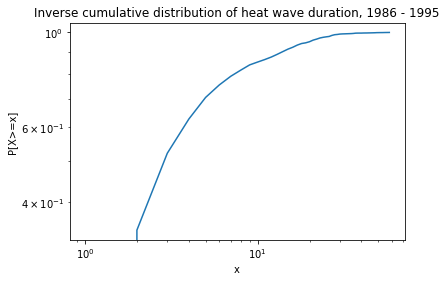

In [29]:
# Plot

plt.plot(X, 1 - Y)
plt.xscale('log')
plt.yscale('log')

plt.title('Inverse cumulative distribution of heat wave duration, 1986 - 1995')
plt.xlabel('x')
plt.ylabel('P[X>=x]')

In [30]:
import scipy.stats as st

In [31]:
# see if it is a pareto dist

dist = st.pareto
params = dist.fit(data) # , 1)
print(params)

/home/cascade/miniconda3/envs/geo/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(1.2139555873251568, -0.5392836674940362, 1.5392836614492125)


In [32]:
# Make a hist

y, x = np.histogram(data, bins = 30, density = True)

# ASK KELLY <<<<<-----
x = (x+np.roll(x, -1))[:-1] / 2.0

# exp
#pdf = dist.pdf(x, loc = params[-2], scale = params[-1])

# pareto 
pdf = dist.pdf(x, 1, loc = params[-2], scale = params[-1])

In [33]:
# Get errors

ss_error = np.sum(np.power(y - pdf, 2.0))
ss_yy = np.sum(np.power(y - y.mean(), 2.0))

In [34]:
# Goodness of fit

r_2 = 1 - (ss_error / ss_yy)
print(r_2)

# https://stackoverflow.com/questions/42260519/defining-pareto-distribution-in-python-scipy

0.9862403574474817


In [ ]:
# KELLY MAKE A PLOT ??? 

# Old code

In [ ]:
# Open Files and Isolate India for Density

def event_stack_loop(dir_in, country):
    
    """ Loop through a dir with csvs of tmax events for each year and
    stack them into one data frame. Current file name is CHIRTS-GHS-Events-StatsXXXX.csv
    
    Args:
        dir_in = dir path to loop through
        country = country to subset

    """
        
    # Get File list
    fn_list = glob.glob(dir_in+'*.csv')
    
    # Data frame to fill
    df_out = pd.DataFrame()
    
    for fn in sorted(fn_list):
        
        #print(fn)
    
        # Likely need to change year to int ... df['purchase'].astype(str).astype(int) <<<<---- FIX 
        year = fn.split('CHIRTS-GHS-Events-Stats')[2].split('.csv')[0] # for some reason it's 2...?
        print(year)
        
        # open csv 
        stats = pd.read_csv(fn)
        
        # isloate country 
        country = stats[stats['CTR_MN_NM']==country].copy()
        print(country.shape)
        
        # add year column 
        country['year'] = year
        
        df_out = df_out.append(country)
    
    df_out['year'] = df_out['year'].astype(str).astype(int)
    
    return df_out


In [ ]:
# open csv 
stats1 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1985.csv')
stats2 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1986.csv')

df_out = pd.DataFrame()

country1 = stats1[stats1['CTR_MN_NM'] == 'India']
country1['year'] = 1985
country2 = stats2[stats2['CTR_MN_NM'] == 'India']
country2['year'] = 1986


df_out = df_out.append(country1)
print(len(df_out))
df_out = df_out.append(country2)
print(len(df_out))

In [ ]:
# Subset 
# https://stackoverflow.com/questions/38884466/how-to-select-a-range-of-values-in-a-pandas-dataframe-column

def year_subset(df, start, end):
    

india_stack[(india_stack['year'] >= 1986) & (india_stack['year'] >= 1995)]
india_stack[(india_stack['year'] >= 1986) & (india_stack['year'] >= 1995)]

In [ ]:
india86_95

In [ ]:
np.unique(india86_95['year'])

In [ ]:
df_out.tail(1)

In [ ]:
# open csv 
stats1 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1985.csv')
stats2 = pd.read_csv(DATA_IN+'CHIRTS-GHS-Events-Stats1986.csv')

df_out = pd.DataFrame()

country1 = stats1[stats1['CTR_MN_NM'] == 'India']
country1['year'] = 1985
country2 = stats2[stats2['CTR_MN_NM'] == 'India']
country2['year'] = 1986


df_out = df_out.append(country1)
print(len(df_out))
df_out = df_out.append(country2)
print(len(df_out))

In [ ]:
country = event_stack[event_stack['CTR_MN_NM'] == 'Vietnam'].copy()
country['year'] = country['year'].astype(str).astype(int)
country83 = country[country['year']== 1983]
country15 = country[country['year']== 2015]
# country86_95 = country[(country['year'] >= 1986) & (country['year'] <= 1995)]

In [ ]:
print(country83.duration.max())
print(country15.duration.max())

In [ ]:
# Get data

india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india83 = india[india['year']== 1983]
india15 = india[india['year']== 1990]
# india86_95 = india[(india['year'] >= 1986) & (india['year'] <= 1995)]

In [16]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india86_95 = india[(india['year'] >= 1986) & (india['year'] <= 1995)]

In [ ]:
india86_95.tail()

In [ ]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india96_05 = india[(india['year'] >= 1996) & (india['year'] <= 2005)]

In [ ]:
india = event_stack[event_stack['CTR_MN_NM'] == 'India'].copy()
india['year'] = india['year'].astype(str).astype(int)
india06_15 = india[(india['year'] >= 2006) & (india['year'] <= 2015)]

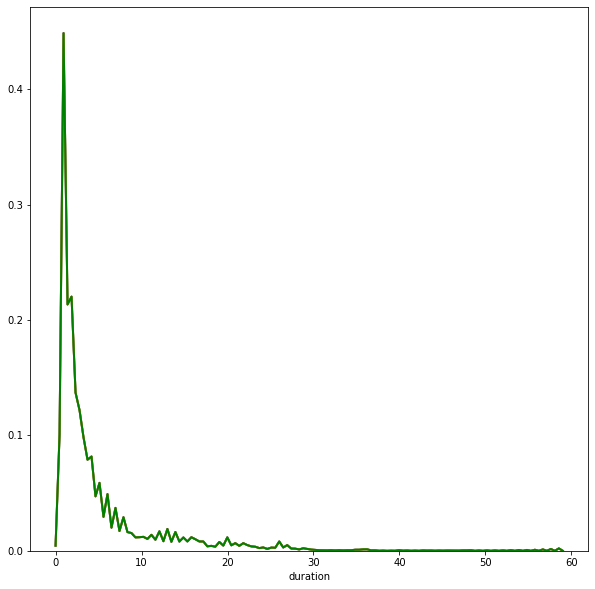

In [26]:
import seaborn as sns

fig = plt.subplots(figsize=[10,10])

sns.distplot(india86_95['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

sns.distplot(india96_05['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

sns.distplot(india06_15['duration'], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Look for events L = 0 ... 